In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
excelFile = pd.ExcelFile(r"Cardiac_Outcomes.xlsx")
HosDis = pd.read_excel(excelFile, 'Hospitalization_Discharge')
CardiacComp = pd.read_excel(excelFile, 'CardiacComplications')
Respons = pd.read_excel(excelFile, 'Responsivenes')
PaHi = pd.read_excel(excelFile, 'PatientHistory')
Labs = pd.read_excel(excelFile, 'Labs')
Demog = pd.read_excel(excelFile, 'Demography')
PatPre = pd.read_excel(excelFile, 'Patient_Precriptions')

#1. Realtion of BMI and AGE category to patients with Mayocardial Infarction.

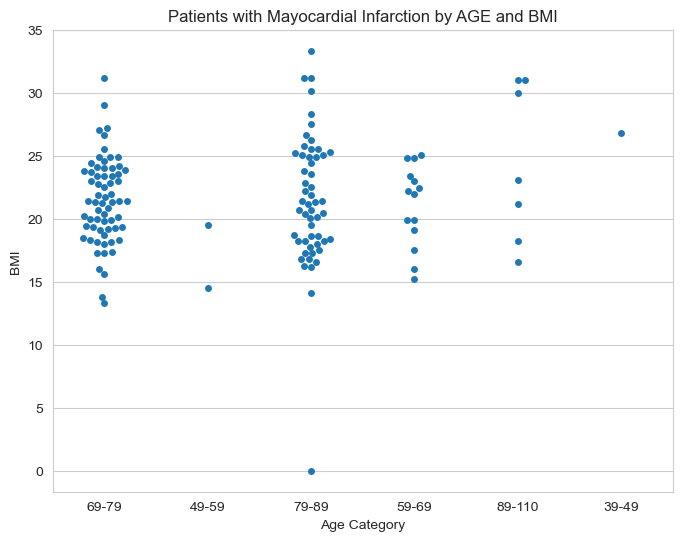

ANALYSIS:

After analysing the data, it shows that large percentage patients with Mayocardial Infarction have high BMI.
From the chart it can be infered that Elderly patients in the Age group of 60-90 have High BMI.
Monitoring weight that is realted to BMI of elderly patients can reduce the chances of having Mayocardial Infarction. 


In [4]:


# Finding patients with myocardial_infarction
mayo_card_pt = CardiacComp[CardiacComp['myocardial_infarction']== 1]
mayo_card_pt
# Merge with Demographic
mayo_card_pt_demog_df = mayo_card_pt.merge(Demog[['inpatient_number','BMI','ageCat']], on ='inpatient_number')
mayo_card_pt_demog_df_filt = mayo_card_pt_demog_df
mayo_card_pt_demog_df_filt = (mayo_card_pt_demog_df_filt.loc[:, ['inpatient_number','BMI', 'ageCat']])
# plot swarmplot using BMI and ageCat
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.swarmplot(x='ageCat', y='BMI', data=mayo_card_pt_demog_df_filt)
plt.xlabel("Age Category")
plt.ylabel("BMI")
plt.title("Patients with Mayocardial Infarction by AGE and BMI")
plt.show()
print('ANALYSIS:')
print()
print('After analysing the data, it shows that large percentage patients with Mayocardial Infarction have high BMI.')
print('From the chart it can be infered that Elderly patients in the Age group of 60-90 have High BMI.')
print('Monitoring weight that is realted to BMI of elderly patients can reduce the chances of having Mayocardial Infarction. ')

#2.  Finding the Count of Patients in each Age Category.

Number of Patients in each Age Category:


[Text(0, 0, '715'),
 Text(0, 0, '368'),
 Text(0, 0, '646'),
 Text(0, 0, '106'),
 Text(0, 0, '101'),
 Text(0, 0, '12'),
 Text(0, 0, '56'),
 Text(0, 0, '4')]

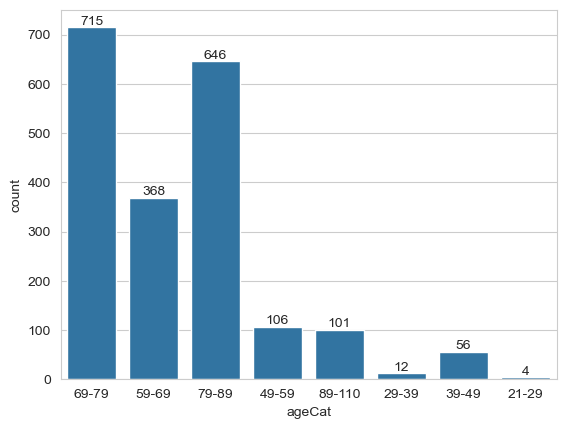

In [5]:
# Bar Plot
# We can now automatically annotate bar plots with the built-in Axes.bar_label.
# access/extract the seaborn plot's Axes
print('Number of Patients in each Age Category:')
ax = sns.countplot(x='ageCat', data=Demog)
ax.bar_label(ax.containers[0])

#3. SBP and platelets realtion Heart Health (Maycardial Infarction)

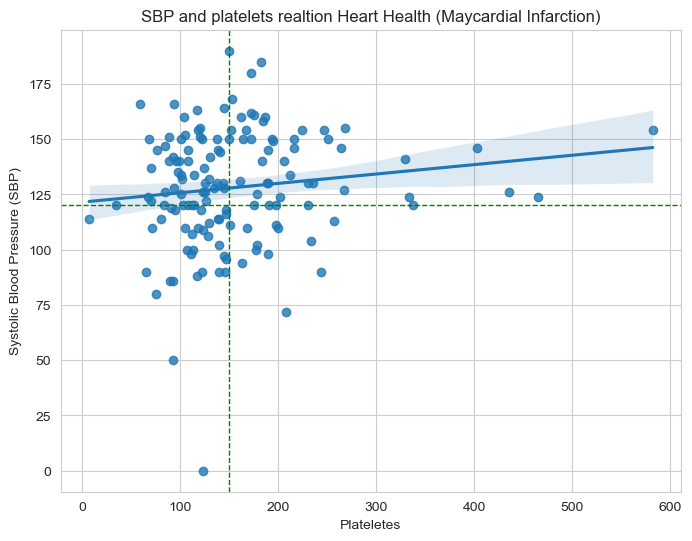

Platelets level: Less than 150 is a condition Thrombocytopenia
SBP level :  Greater than 120 is At Risk Hypertension

ANALYSIS:

After analysing the data, it shows that large percentage patients with Mayocardial Infarction have high SBP >150.
From the chart it can be seen that large volume of patients having Mayocardial Infarction have Low Platelets Count < 150.
SBP is slighlty realted to Platelet counts. Monitoring Platelet counts and SPB can be crutial in preventing Heart Health. 


In [7]:
mayo_card_pt = CardiacComp[CardiacComp['myocardial_infarction']== 1]
mayo_card_pt_boimarker_df = mayo_card_pt.merge(Labs[['inpatient_number','platelet', 'systolic_blood_pressure']], on ='inpatient_number')
mayo_card_pt_boimarker_df_filt = mayo_card_pt_boimarker_df
mayo_card_pt_boimarker_df_filt = (mayo_card_pt_boimarker_df_filt.loc[:, ['inpatient_number','platelet', 'systolic_blood_pressure']])
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.regplot(x='platelet', y='systolic_blood_pressure', data=mayo_card_pt_boimarker_df_filt)
plt.xlabel("Plateletes")
plt.ylabel("Systolic Blood Pressure (SBP)")
# Show line for Normal Platelets level . less than 150 is a condition Thrombocytopenia.
plt.axvline(x=150 , color = 'g',
  linestyle = '--',
  linewidth = 1)
# Show line for Normal SBP level . Greater than 120 is At Risk (prehypertension)
plt.axhline(y=120 , color = 'g',
  linestyle = '--',
  linewidth = 1)
plt.title("SBP and platelets realtion Heart Health (Maycardial Infarction)")
plt.show()
print('Platelets level: Less than 150 is a condition Thrombocytopenia')
print('SBP level :  Greater than 120 is At Risk Hypertension')
print()
print('ANALYSIS:')
print()
print('After analysing the data, it shows that large percentage patients with Mayocardial Infarction have high SBP >150.')
print('From the chart it can be seen that large volume of patients having Mayocardial Infarction have Low Platelets Count < 150.')
print('SBP is slighlty realted to Platelet counts. Monitoring Platelet counts and SPB can be crutial in preventing Heart Health. ')


#4. Display total count of patients by Mean Arterial Pressure(MAP) level based on gender

In [3]:
# Function to calculate MAP range
def map_range(map):
    if map <70:
        return 'Low MAP Range'
    elif (map>=70) & (map <=100):
        return 'Normal MAP Range'
    elif map>100:
        return 'High MAP Range'
map_df = (Labs.loc[:, ['inpatient_number','map']])
map_df['MAP Range'] = map_df['map'].apply(map_range)
map_df_gp = map_df.groupby('MAP Range')['inpatient_number'].nunique().reset_index()
dfNew_map = map_df.merge(Demog[['inpatient_number','gender']], on ='inpatient_number')
print('Total count of patients by Mean Arterial Pressure(MAP) level based on gender.')
print()
print('Analysis: As seen large number of patients have High MAP level which directly affects Heart Heath leading to Heart Attack/Heart Failure ')
dfNew_map.groupby(['gender', 'MAP Range'])['inpatient_number'].agg(['nunique'])

Total count of patients by Mean Arterial Pressure(MAP) level based on gender.

Analysis: As seen large number of patients have High MAP level which directly affects Heart Heath leading to Heart Attack/Heart Failure 


nunique
gender MAP Range                
Female High MAP Range        393
       Low MAP Range          26
       Normal MAP Range      744
Male   High MAP Range        276
       Low MAP Range          29
       Normal MAP Range      540

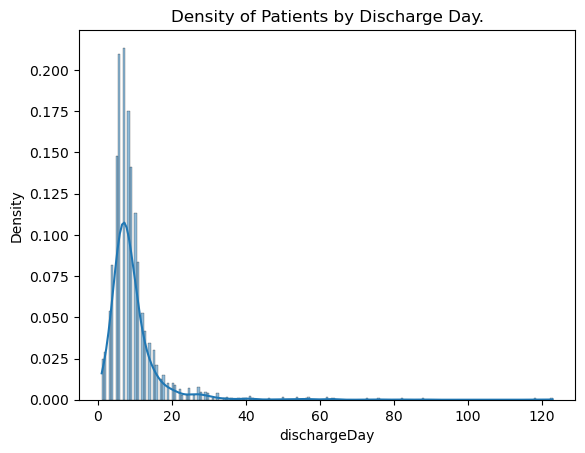

Analysis: Large volume of Patients have Discharge day between 0 to 40.


In [4]:
# plotting histogram and density plot for Discharge Dyas
sns.histplot(HosDis["dischargeDay"], kde=True ,stat="density" )
plt.title("Density of Patients by Discharge Day.")
plt.show()
print('Analysis: Large volume of Patients have Discharge day between 0 to 40.')